In [14]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt


In [16]:
import pandas as pd
df = pd.read_csv("data/dairy_goods_sales.csv")
df.head()


,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Location                             4325 non-null   object 
 1   Total Land Area (acres)              4325 non-null   float64
 2   Number of Cows                       4325 non-null   int64  
 3   Farm Size                            4325 non-null   object 
 4   Date                                 4325 non-null   object 
 5   Product ID                           4325 non-null   int64  
 6   Product Name                         4325 non-null   object 
 7   Brand                                4325 non-null   object 
 8   Quantity (liters/kg)                 4325 non-null   float64
 9   Price per Unit                       4325 non-null   float64
 10  Total Value                          4325 non-null   float64
 11  Shelf Life (days)             

In [20]:
df.head()

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40


In [22]:
df_prophet = df[["Date", "Quantity Sold (liters/kg)"]].copy()
df_prophet.rename(columns={"Date": "ds", "Quantity Sold (liters/kg)": "y"}, inplace=True)
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"])
df_prophet.head()


,ds,y
0,2022-02-17,7
1,2021-12-01,558
2,2022-02-28,256
3,2019-06-09,601
4,2020-12-14,145


In [122]:
from prophet import Prophet

# New model each time
model = Prophet()
model.fit(df_prophet)

# Proceed with forecasting
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



23:04:42 - cmdstanpy - INFO - Chain [1] start processing
23:04:42 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
1363,2023-03-24,200.468303,-96.692271,450.946905
1364,2023-03-25,204.345190,-77.322993,462.424140
1365,2023-03-26,193.744942,-96.530538,474.489611
1366,2023-03-27,203.661872,-69.305475,479.730418
1367,2023-03-28,204.521750,-80.332956,473.645382


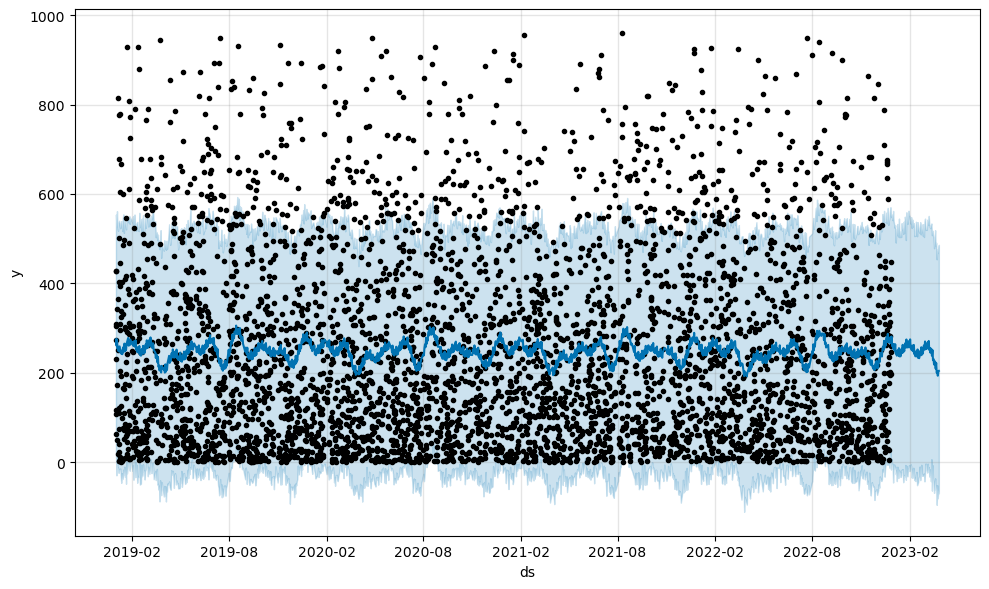

In [46]:
# Plot forecast
fig1 = model.plot(forecast)


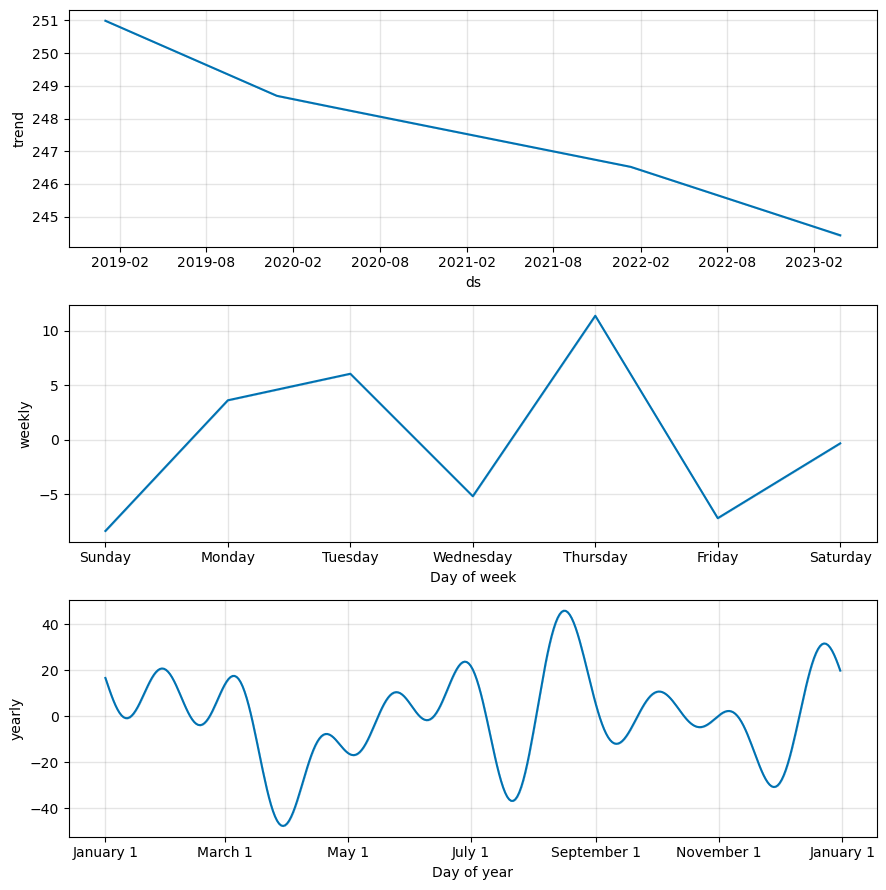

In [48]:
# Plot components (trend, weekly seasonality, yearly seasonality)
fig2 = model.plot_components(forecast)


In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Merge forecast with actual data
df_merged = pd.merge(df_prophet, forecast[['ds', 'yhat']], on='ds', how='inner')

# Calculate error metrics
mae = mean_absolute_error(df_merged['y'], df_merged['yhat'])
rmse = np.sqrt(mean_squared_error(df_merged['y'], df_merged['yhat']))

print(f"📊 MAE (Mean Absolute Error): {mae:.2f}")
print(f"📉 RMSE (Root Mean Squared Error): {rmse:.2f}")


📊 MAE (Mean Absolute Error): 175.87
📉 RMSE (Root Mean Squared Error): 216.11


In [52]:
df["Product Name"].unique()


array(['Ice Cream', 'Milk', 'Yogurt', 'Cheese', 'Buttermilk', 'Curd',
       'Paneer', 'Lassi', 'Ghee', 'Butter'], dtype=object)

In [54]:
# Replace "Milk" with any other product if you want
sku_name = "Ice Cream"

df_sku = df[df["Product Name"] == sku_name].copy()

# Keep only the date and quantity sold columns
df_sku_prophet = df_sku[["Date", "Quantity Sold (liters/kg)"]].copy()
df_sku_prophet.rename(columns={"Date": "ds", "Quantity Sold (liters/kg)": "y"}, inplace=True)
df_sku_prophet["ds"] = pd.to_datetime(df_sku_prophet["ds"])

df_sku_prophet.head()


,ds,y
0,2022-02-17,7
13,2019-12-26,80
14,2022-04-10,645
43,2021-04-09,6
51,2021-03-08,305


In [56]:
from prophet import Prophet

# Create and train a new Prophet model for the SKU
sku_model = Prophet()
sku_model.fit(df_sku_prophet)

print(f"✅ Prophet model trained for '{sku_name}'")


23:00:29 - cmdstanpy - INFO - Chain [1] start processing
23:00:29 - cmdstanpy - INFO - Chain [1] done processing


✅ Prophet model trained for 'Ice Cream'


In [58]:
# Forecast the next 90 days
future_sku = sku_model.make_future_dataframe(periods=90)
forecast_sku = sku_model.predict(future_sku)

# Show last few predicted values
forecast_sku[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
441,2023-03-18,246.283910,-36.199759,523.184795
442,2023-03-19,203.455707,-87.482088,488.884414
443,2023-03-20,217.485644,-65.047285,486.708725
444,2023-03-21,155.238803,-118.470617,420.219250
445,2023-03-22,242.955355,-19.653488,529.873754


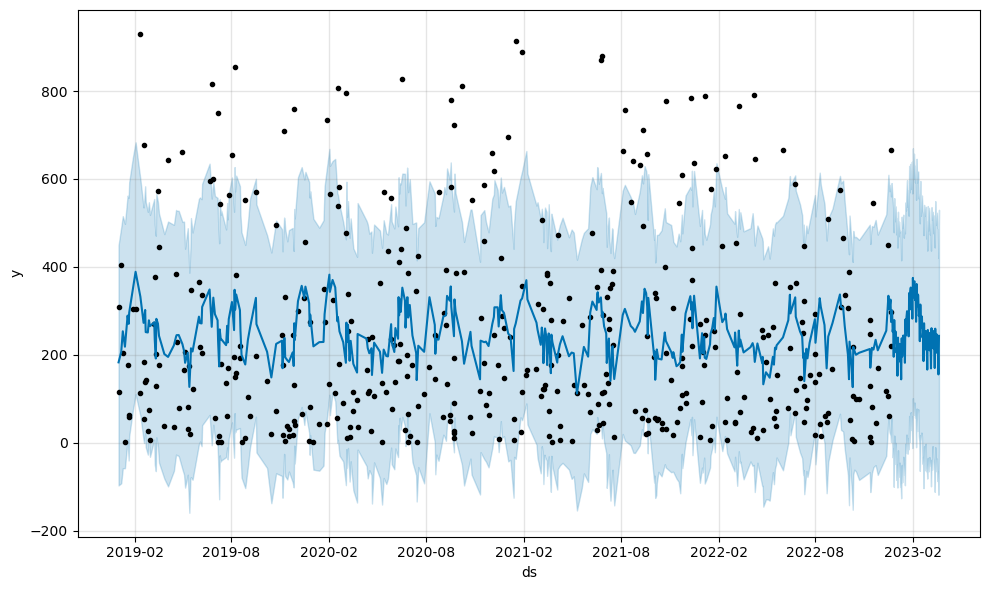

In [60]:
# Forecast plot
fig1 = sku_model.plot(forecast_sku)


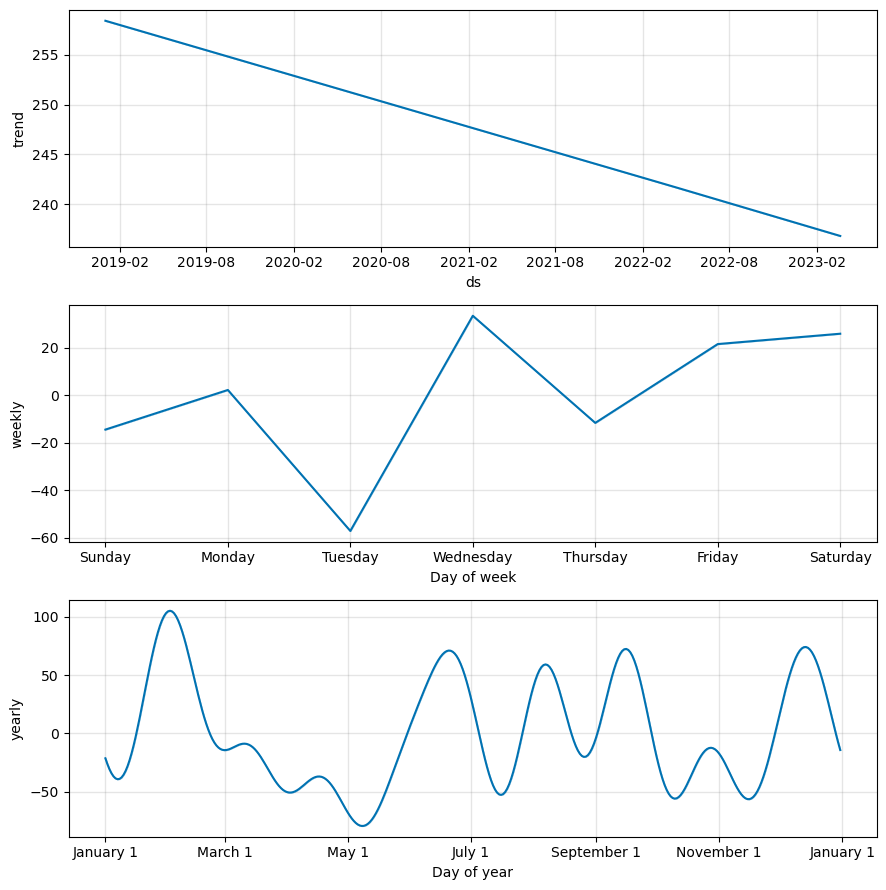

In [62]:
# Components: trend, weekly, yearly patterns
fig2 = sku_model.plot_components(forecast_sku)


In [64]:
from prophet import Prophet
from tqdm import tqdm

# Unique product list
products = df["Product Name"].unique()

# Store forecasts here
sku_forecasts = {}

for sku in tqdm(products):
    # Filter and prepare data
    df_sku = df[df["Product Name"] == sku].copy()
    df_sku_prophet = df_sku[["Date", "Quantity Sold (liters/kg)"]].copy()
    df_sku_prophet.rename(columns={"Date": "ds", "Quantity Sold (liters/kg)": "y"}, inplace=True)
    df_sku_prophet["ds"] = pd.to_datetime(df_sku_prophet["ds"])

    if len(df_sku_prophet) < 30:  # Skip if too little data
        continue

    # Train model
    model = Prophet()
    model.fit(df_sku_prophet)

    # Forecast
    future = model.make_future_dataframe(periods=90)
    forecast = model.predict(future)

    # Store results
    sku_forecasts[sku] = {
        "model": model,
        "data": df_sku_prophet,
        "forecast": forecast
    }

print(f"✅ Forecasts generated for {len(sku_forecasts)} SKUs")


  0%|                                                    | 0/10 [00:00<?, ?it/s]23:00:30 - cmdstanpy - INFO - Chain [1] start processing
23:00:30 - cmdstanpy - INFO - Chain [1] done processing
 10%|████▍                                       | 1/10 [00:00<00:01,  6.09it/s]23:00:31 - cmdstanpy - INFO - Chain [1] start processing
23:00:31 - cmdstanpy - INFO - Chain [1] done processing
 20%|████████▊                                   | 2/10 [00:00<00:01,  6.33it/s]23:00:31 - cmdstanpy - INFO - Chain [1] start processing
23:00:31 - cmdstanpy - INFO - Chain [1] done processing
 30%|█████████████▏                              | 3/10 [00:00<00:01,  5.98it/s]23:00:31 - cmdstanpy - INFO - Chain [1] start processing
23:00:31 - cmdstanpy - INFO - Chain [1] done processing
 40%|█████████████████▌                          | 4/10 [00:00<00:00,  6.48it/s]23:00:31 - cmdstanpy - INFO - Chain [1] start processing
23:00:31 - cmdstanpy - INFO - Chain [1] done processing
 50%|██████████████████████        

✅ Forecasts generated for 10 SKUs


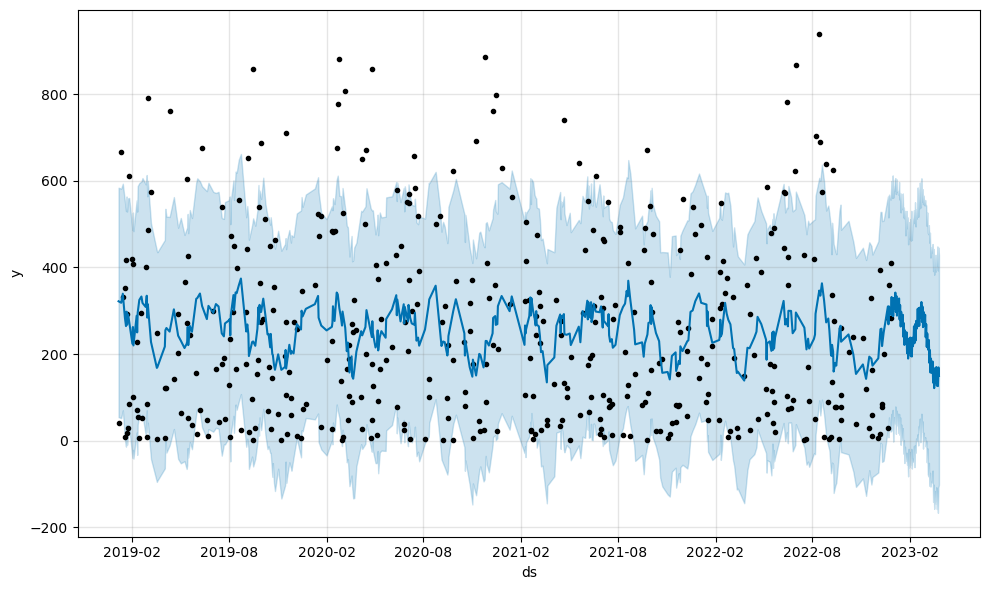

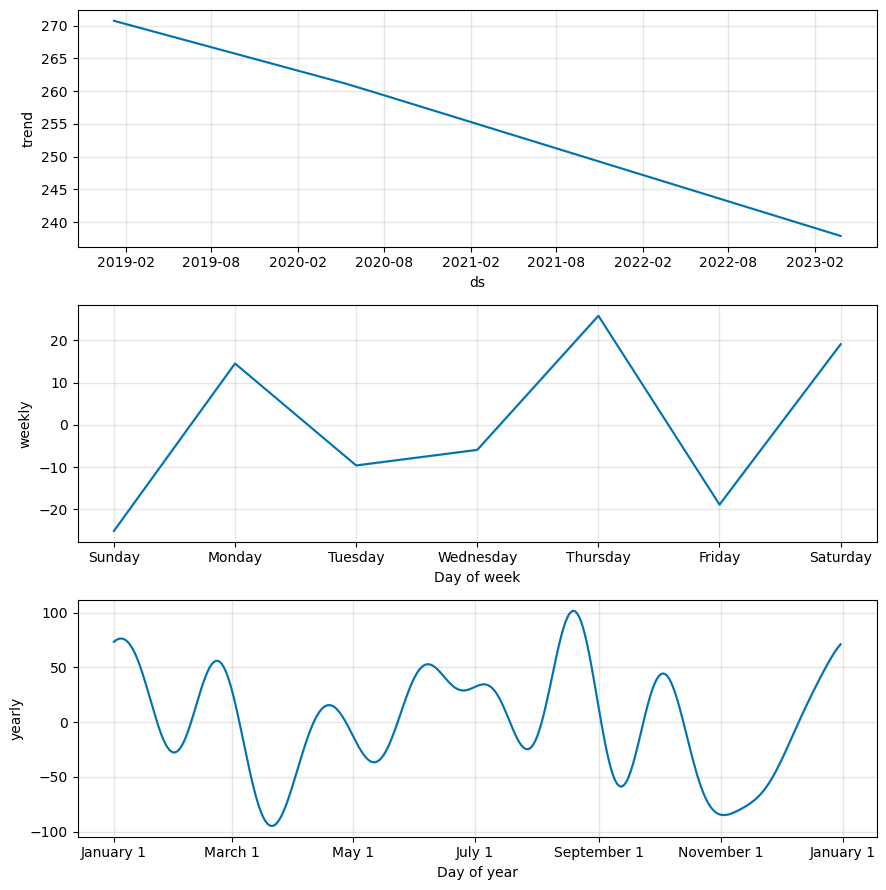

In [65]:
# Choose a product from your earlier list
selected_sku = "Milk"  # You can change this to any product name you saw earlier

# Pull the forecast and model from the dictionary
model = sku_forecasts[selected_sku]["model"]
forecast = sku_forecasts[selected_sku]["forecast"]

# Plot forecast
fig1 = model.plot(forecast)

# Plot components
fig2 = model.plot_components(forecast)


In [67]:
# Assume lead time is 7 days (can be customized later per SKU)
lead_time = 7

# Store inventory metrics
inventory_metrics = {}

for sku in sku_forecasts:
    forecast_df = sku_forecasts[sku]["forecast"]

    # Use only future values (not historical)
    future_forecast = forecast_df[forecast_df["ds"] > df["Date"].max()]

    # Calculate average daily demand
    avg_daily_demand = future_forecast["yhat"].mean()

    # Calculate std deviation of predicted demand
    demand_std = future_forecast["yhat"].std()

    # Safety stock (assuming 95% service level)
    safety_stock = 1.65 * demand_std

    # Reorder Point
    reorder_point = (avg_daily_demand * lead_time) + safety_stock

    # Store results
    inventory_metrics[sku] = {
        "avg_daily_demand": round(avg_daily_demand, 2),
        "demand_std_dev": round(demand_std, 2),
        "safety_stock": round(safety_stock, 2),
        "reorder_point": round(reorder_point, 2)
    }

# Preview results for all SKUs
import pandas as pd
inventory_df = pd.DataFrame(inventory_metrics).T
inventory_df.head()


,avg_daily_demand,demand_std_dev,safety_stock,reorder_point
Ice Cream,254.10,54.68,90.22,1868.95
Milk,243.22,57.95,95.62,1798.18
Yogurt,249.52,58.86,97.12,1843.74
Cheese,223.99,64.56,106.52,1674.47
Buttermilk,215.33,37.50,61.87,1569.18


In [70]:
# Create an empty dataframe to store total demand per day
from collections import defaultdict
total_forecast = defaultdict(float)

# Sum yhat across all SKUs
for sku in sku_forecasts:
    forecast_df = sku_forecasts[sku]["forecast"]
    future_only = forecast_df[forecast_df["ds"] > df["Date"].max()]
    
    for _, row in future_only.iterrows():
        total_forecast[row["ds"]] += row["yhat"]

# Convert to DataFrame
df_capacity = pd.DataFrame(list(total_forecast.items()), columns=["Date", "Total Forecasted Volume"])
df_capacity.sort_values("Date", inplace=True)

df_capacity.head()


,Date,Total Forecasted Volume
0,2022-12-29,2854.660304
1,2022-12-30,2615.169890
2,2022-12-31,2657.268761
3,2023-01-01,2607.640316
4,2023-01-02,2659.687294


In [72]:
# Set daily plant capacity
daily_capacity_limit = 2000  # adjust as needed

# Flag overload days
df_capacity["Over Capacity?"] = df_capacity["Total Forecasted Volume"] > daily_capacity_limit

# Show days where demand exceeds capacity
df_capacity[df_capacity["Over Capacity?"] == True]


,Date,Total Forecasted Volume,Over Capacity?
0,2022-12-29,2854.660304,True
1,2022-12-30,2615.169890,True
2,2022-12-31,2657.268761,True
3,2023-01-01,2607.640316,True
4,2023-01-02,2659.687294,True
...,...,...,...
74,2023-03-13,2228.475070,True
75,2023-03-14,2181.185358,True
76,2023-03-15,2053.839921,True
77,2023-03-16,2219.307062,True


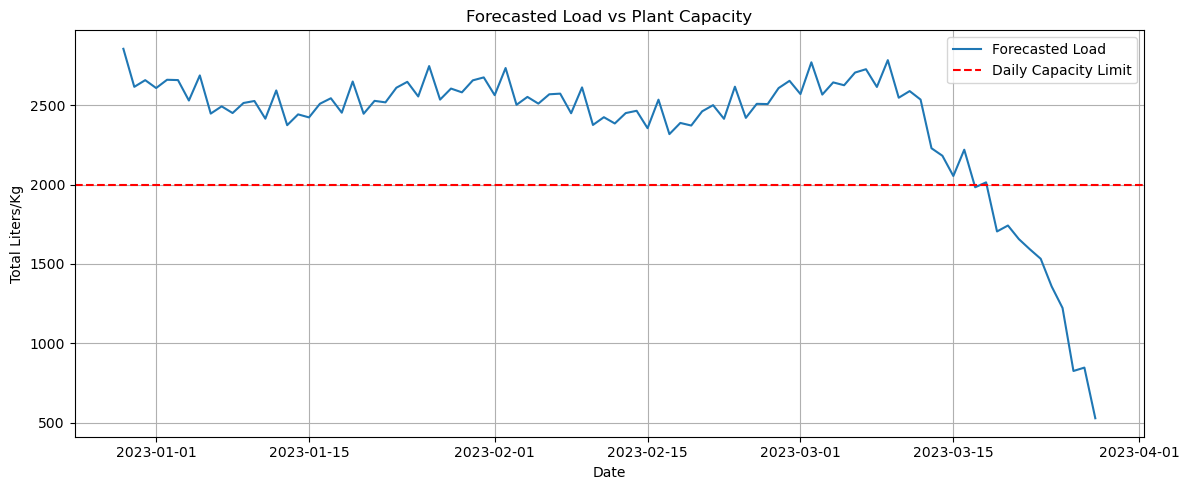

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df_capacity["Date"], df_capacity["Total Forecasted Volume"], label="Forecasted Load")
plt.axhline(y=daily_capacity_limit, color="r", linestyle="--", label="Daily Capacity Limit")
plt.title("Forecasted Load vs Plant Capacity")
plt.xlabel("Date")
plt.ylabel("Total Liters/Kg")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [76]:
# Export inventory strategy
inventory_df.to_csv("inventory_strategy.csv", index=True)

# Export total plant capacity forecast
df_capacity.to_csv("capacity_forecast.csv", index=False)

print("✅ Files saved: inventory_strategy.csv and capacity_forecast.csv")


✅ Files saved: inventory_strategy.csv and capacity_forecast.csv


In [78]:
sku_capacity_limits = {
    "Milk": 1000,
    "Cheese": 800,
    "Yogurt": 600,
    "Ice Cream": 700,
    "Buttermilk": 400
}


In [80]:
sku_overload = {}

for sku, values in sku_forecasts.items():
    if sku not in sku_capacity_limits:
        continue  # skip if no capacity defined

    forecast_df = values["forecast"]
    future_forecast = forecast_df[forecast_df["ds"] > df["Date"].max()]

    # Check for overload
    overload_days = future_forecast[future_forecast["yhat"] > sku_capacity_limits[sku]]

    if not overload_days.empty:
        sku_overload[sku] = overload_days[["ds", "yhat"]]

# Example: Show overload for Milk
sku_overload.get("Milk", "✅ No overloads for Milk")


'✅ No overloads for Milk'

In [82]:
summary = []

for sku in inventory_metrics:
    summary.append({
        "SKU": sku,
        "Avg Daily Demand": inventory_metrics[sku]["avg_daily_demand"],
        "Safety Stock": inventory_metrics[sku]["safety_stock"],
        "Reorder Point": inventory_metrics[sku]["reorder_point"],
        "Max Forecasted Demand (Next 90 Days)": round(sku_forecasts[sku]["forecast"]["yhat"].max(), 2)
    })

summary_df = pd.DataFrame(summary)
summary_df.to_csv("sku_summary_report.csv", index=False)
summary_df.head()


,SKU,Avg Daily Demand,Safety Stock,Reorder Point,Max Forecasted Demand (Next 90 Days)
0,Ice Cream,254.10,90.22,1868.95,388.80
1,Milk,243.22,95.62,1798.18,374.52
2,Yogurt,249.52,97.12,1843.74,382.80
3,Cheese,223.99,106.52,1674.47,412.28
4,Buttermilk,215.33,61.87,1569.18,377.14


In [86]:
import pandas as pd

# Load your dataset (change the path if it's in another folder)
df = pd.read_csv("data/dairy_goods_sales.csv")
df.head()


,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40


In [88]:
# Convert date
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date
df = df.sort_values('Date')

# Fill missing Quantity Sold if any
df['Quantity Sold (liters/kg)'] = df['Quantity Sold (liters/kg)'].fillna(0)

# Rename columns for simplicity
df.rename(columns={'Quantity Sold (liters/kg)': 'Quantity_Sold'}, inplace=True)


In [90]:
# Feature Engineering
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['dayofweek'] = df['Date'].dt.dayofweek


In [92]:
# Define features and target
X = df[['day', 'month', 'year', 'dayofweek']]
y = df['Quantity_Sold']


In [98]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X, y)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [102]:
import pickle

with open('flavi_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("✅ Model saved as forecast_model.pkl")


✅ Model saved as forecast_model.pkl


In [106]:
import pickle

with open('flavi_model.pkl', 'rb') as f:
    model = pickle.load(f)


In [108]:
# Recreate X from your historical dataset
X = df[['day', 'month', 'year', 'dayofweek']]

# Predict
df['Predicted_Quantity_Sold'] = model.predict(X)


In [110]:
import pandas as pd

# Generate next 7 days
future_dates = pd.date_range(start=df['Date'].max() + pd.Timedelta(days=1), periods=7)

# Create a new DataFrame
future_df = pd.DataFrame({'Date': future_dates})
future_df['day'] = future_df['Date'].dt.day
future_df['month'] = future_df['Date'].dt.month
future_df['year'] = future_df['Date'].dt.year
future_df['dayofweek'] = future_df['Date'].dt.dayofweek

# Predict
future_df['Predicted_Quantity_Sold'] = model.predict(future_df[['day', 'month', 'year', 'dayofweek']])


In [112]:
future_df[['Date', 'Predicted_Quantity_Sold']]



,Date,Predicted_Quantity_Sold
0,2022-12-29,370.872009
1,2022-12-30,335.429169
2,2022-12-31,319.917725
3,2023-01-01,119.468208
4,2023-01-02,341.944519
5,2023-01-03,361.981873
6,2023-01-04,477.471527


In [114]:
future_df[['Date', 'Predicted_Quantity_Sold']].to_csv("predictions_future.csv", index=False)

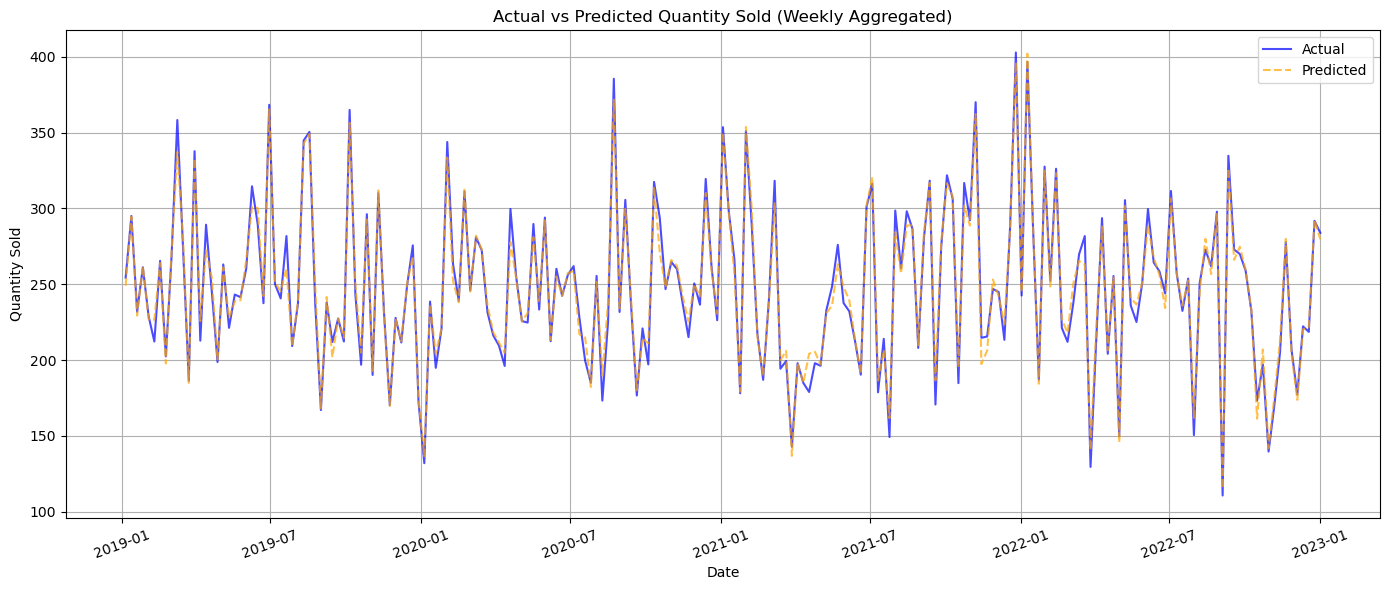

In [138]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure Date is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set index for resampling
df.set_index('Date', inplace=True)

# Keep only numeric columns (drop all object/string columns before resampling)
df_numeric = df.select_dtypes(include='number')

df_weekly = df_numeric.resample('W').mean().reset_index()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df_weekly['Date'], df_weekly['Quantity_Sold'], label='Actual', color='blue', linewidth=1.5, alpha=0.7)
plt.plot(df_weekly['Date'], df_weekly['Predicted_Quantity_Sold'], label='Predicted', color='orange', linestyle='--', linewidth=1.5, alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.title('Actual vs Predicted Quantity Sold (Weekly Aggregated)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()




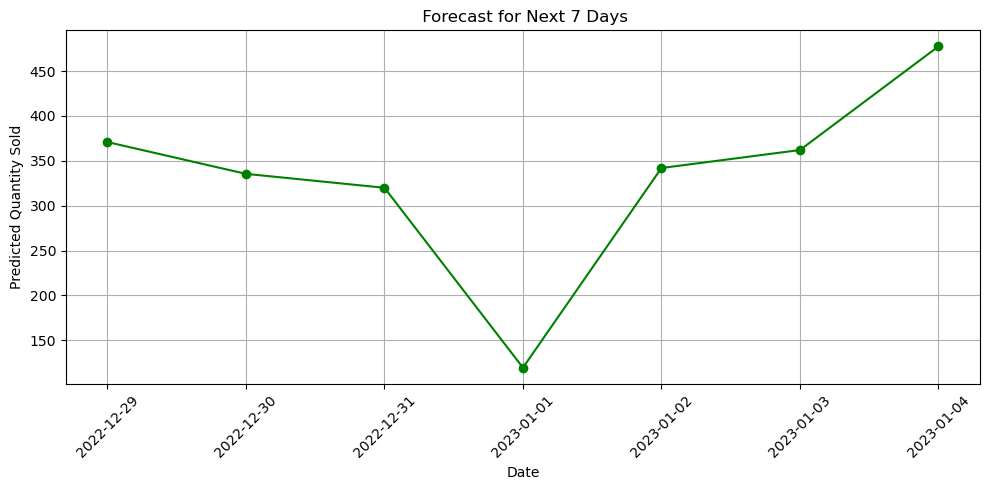

In [118]:
plt.figure(figsize=(10, 5))
plt.plot(future_df['Date'], future_df['Predicted_Quantity_Sold'], marker='o', color='green')
plt.title(" Forecast for Next 7 Days")
plt.xlabel("Date")
plt.ylabel("Predicted Quantity Sold")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
